In [1]:
# Tested with Python 3 

In [2]:
import skimage
from skimage  import io, filters, feature, morphology
from IPython.display import display
import numpy as np
import time
from os import path 
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Import module with Gaussian fitter
import sys
sys.path.append('/Volumes/PILON_HD2/fmueller/Documents/Programming/Python/Toolbox/ImageProcessing/Detection')
sys.path.append('/Volumes/PILON_HD2/fmueller/Documents/Programming/Python/Projects/FISH_quant/scr')
import smFISHanalyzer

import importlib

%matplotlib inline

## Size of loaded image (Z-Y-X): (76, 736, 850)
## Filtering image with double Gaussian filter ... 

/Users/remydubois/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint16.
  .format(dtypeobj_in, dtypeobj_out))
/Users/remydubois/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint16 without scaling because max value 12955 fits in uint16
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


 done!


Local Maximum detection - number of pre-detections: 25


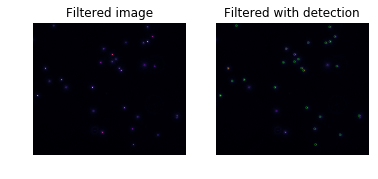

In [4]:
# Reload class
importlib.reload(smFISHanalyzer)

# Specify class
FQ_img = smFISHanalyzer.FQimg()
FQ_img.param['filter_name'] = "2XG"  # LoG for Laplacian of Gaussian, 2XG for double Gaussian
FQ_img.param['filter_LoG_ksize'] = 3
FQ_img.param['filter_2XG_bgd'] = [5, 5, 5]
FQ_img.param['filter_2XG_spot'] = [.5, .5, 0.5]

# Specify file and load it
img_file_name_full = '/Users/remydubois/Dropbox/Remy/Python/CodeFragments/TestData/Experiment-453.czi #001 - C=1-1.tif'
FQ_img.loadImage3D(img_file_name_full,flag_output = (True,True))

# Filter image
FQ_img.param['filter_name'] = "2XG"
FQ_img.filterImage3D(flag_output = (True,False))

# Perform detection
FQ_img.param['detect_method'] = "LocMax"
FQ_img.param['detect_int'] = 5000
FQ_img.param['detect_mind_dist'] = 10

FQ_img.detectSpots3D(flag_output = (True,True))

In [6]:
# Fit all predetected positions
FQ_img.param['fit_sigma_init'] = [1,1]
FQ_img.param['fit_crop'] = [3,2,2]

FQ_img.fitSpots3D(flag_output = (True,True))

NameError: name 'gaussFit' is not defined

In [ ]:
# Perform filtering
start_time = time.time()

if filter_name == "LoG":
    print('== Filtering image with LoG filter')
    img_beads_filt = filters.laplace(img_beads_raw,ksize=LoG_ksize)
    img_beads_filt = skimage.img_as_uint(img_beads_filt)
   
elif filter_name == "2XG":
    print('== Filtering image with double Gaussian filter')
    img_bgd = filters.gaussian(img_beads_raw, filter_2XG_bgd)
    img_beads_filt = filters.gaussian(img_beads_raw-img_bgd,filter_2XG_spot)
    img_beads_filt = skimage.img_as_uint(img_beads_filt.astype('int'))  
    
# Perform MIPS
img_beads_filt_MIP = (np.amax(img_beads_filt, axis=0))

# Show filtering time
print("Done after: {:.1f} sec".format(time.time() - start_time))

In [ ]:
# Show projections
if flag_plot== True:
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.imshow(img_beads_raw_MIP,cmap='magma')
    ax2.imshow(img_beads_filt_MIP,cmap='magma')

In [ ]:
# Save filtered image
flag_save = True
if flag_save == True:
    
    # Get file-name
    file_name_save = path.join(img_path_name, base_filename + "_filt" + ext)
   
    # Save renormalized image
    io.imsave(file_name_save,img_beads_filt)
    print("Filtering image save as")
    print( file_name_save)

In [ ]:
flag_save = False

# Perform detection with local maximum - result is np array
pos_detect = (skimage.feature.peak_local_max(img_beads_filt, min_distance=10, threshold_abs=5000, threshold_rel=None))
Ndet, dum = pos_detect.shape
display("Local Max - number of pre-detections: {}".format(Ndet))

# Get coordonates of pre-detected positions
pos_detect_z =  np.ndarray.tolist(pos_detect[:,0])
pos_detect_x =  np.ndarray.tolist(pos_detect[:,2])
pos_detect_y =  np.ndarray.tolist(pos_detect[:,1])

int_predetect = img_beads_filt[pos_detect_z,pos_detect_y,pos_detect_x];

# Create figure and axes
fig_detect,(ax1, ax2) = plt.subplots(1,2) 

plt.subplot(121)
plt.imshow(img_beads_filt_MIP,cmap='magma')
plt.axis('off')
plt.title('Filtered image')

ax2=plt.subplot(122)
plt.imshow(img_beads_filt_MIP,cmap='magma')
plt.axis('off')
plt.title('Filtered with detection')

# Create circle patches and add them to the image
for x,y in zip(pos_detect_x,pos_detect_y):
    detect_circ = patches.Circle((x,y),linewidth=0.5,edgecolor='g',facecolor='none')
    ax2.add_patch(detect_circ)

# Save results of detection 
if flag_save is True:
    file_name_save = path.join(img_path_name, base_filename + "_detect.png")
    fig_detect.savefig(file_name_save, dpi=900,bbox_inches='tight')

In [ ]:
# Plot a fitted position
gaussFit.plotGaussian3Dbatchfit(result_all,img_crop_all,4)

In [ ]:
# note 1: the with statement gurarntess that the file is properly closed
# note 2: the 'b' opens the file in binary rather than in text mode
# This is for the first call, for subsequent calls change the 'wb' to 'ab'

fname = path.join(img_path_name, base_filename + "__FIT.txt")

# Write some information about results
with open(fname, 'w') as text_file:
    print('# File-name\t{}'.format(img_file_name), file=text_file)

# Write results of spot detection    
with open(fname,'ab') as f_handle:
    header = ('detect_z[pix]\tdetect_y[pix]\tdetect_x[pix]\t'
              'fit_z[pix]\tfit_y[pix]\t_fit_x[pix]\t'
              'fit_bgd\tfit_amp\tfit_z_sub[pix]\tfit_y_sub[pix]\t_fit_x_sub[pix]\tfit_sz\tfit_sxy')
    np.savetxt(f_handle, result_all, fmt='%f', delimiter='\t', newline='\n', header=header, footer='', comments='# ')

In [ ]:
# FIND pair-wise matches

from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

# Get data-sets from pre-detection
XA = pos_detect
XB = XA.copy()
np.random.shuffle(XB)
XB = XB + np.random.randint(5, size=XB.shape)-2

# Calculate paire-wise distance
cost_matrix = cdist(XA,  XB, 'euclidean')

# Solve linear assignment problem
row_ind, col_ind = linear_sum_assignment(cost_matrix)


if flag_print == True:
    print('Total cost: {:.2f}'.format(cost_matrix[row_ind, col_ind].sum()))
    
    for row, column in zip(row_ind,col_ind):
         print('({}, {}) -> {:.4f}'.format(row, column, cost_matrix[row,column]))